## Obtem os dados analisados e tratados e treina o modelo fazendo a clusterização dos acidentes aeronáuticos.

In [67]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [68]:
# carrega arquivos em dataframes
df_acidentes_aero_trans = pd.read_csv('arquivos_tratados/df_acidentes_aero_trans.csv')

In [69]:
df_acidentes_aero_trans = df_acidentes_aero_trans.sort_index()

In [70]:
columns = [
        'ocorrencia_classificacao',
        'ocorrencia_uf', 
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_ano_fabricacao',
        'aeronave_fase_operacao',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'fator_nome',
        'fator_aspecto',
        'fator_condicionante',
        'fator_area',
        'recomendacao_status',
        'periodo',
        'total_aeronaves_envolvidas', 

        'aeronave_pmd', 
        'aeronave_assentos', 
        'aeronave_fatalidades_total',  

        'ocorrencia_latitude',
        'ocorrencia_longitude',
        ]

In [71]:
df_acidentes_aero = df_acidentes_aero_trans[columns]

In [72]:
df_acidentes_aero_trans.shape

(9357, 1064)

In [73]:
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_ano_fabricacao,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_status,periodo,total_aeronaves_envolvidas,aeronave_pmd,aeronave_assentos,aeronave_fatalidades_total,ocorrencia_latitude,ocorrencia_longitude
0,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,BIMOTOR,1993.0,PARTIDA DO MOTOR,PRIVADA,***,***,***,***,***,***,00:00 às 06:00,1.0,2155.0,6.0,0.0,0.0,0.0
1,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,MONOMOTOR,1982.0,INDETERMINADA,PRIVADA,NENHUM,***,***,***,***,***,18:00 às 00:00,1.0,1315.0,4.0,0.0,0.0,0.0
2,INCIDENTE,PE,NÃO,AVIÃO,JATO,BIMOTOR,0.0,INDETERMINADA,***,***,***,***,***,***,***,18:00 às 00:00,1.0,0.0,0.0,0.0,0.0,0.0
3,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,MONOMOTOR,1991.0,MUDANÇA DE NÍVEL OU ALTITUDE,INSTRUÇÃO,***,***,***,***,***,***,00:00 às 06:00,1.0,770.0,2.0,0.0,0.0,0.0
4,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,BIMOTOR,1976.0,TÁXI,TÁXI AÉREO,NENHUM,***,***,***,***,***,18:00 às 00:00,1.0,3175.0,10.0,0.0,0.0,0.0


In [74]:
df_acidentes_aero_trans = df_acidentes_aero_trans.drop(columns=columns, axis=1)

In [75]:
df_acidentes_aero_trans.shape

(9357, 1042)

In [76]:
df_acidentes_aero_trans.head(5)

,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_uf_***,one-hot__ocorrencia_uf_AC,one-hot__ocorrencia_uf_AL,one-hot__ocorrencia_uf_AM,one-hot__ocorrencia_uf_AP,one-hot__ocorrencia_uf_BA,one-hot__ocorrencia_uf_CE,one-hot__ocorrencia_uf_DF,one-hot__ocorrencia_uf_ES,one-hot__ocorrencia_uf_GO,one-hot__ocorrencia_uf_MA,one-hot__ocorrencia_uf_MG,one-hot__ocorrencia_uf_MS,one-hot__ocorrencia_uf_MT,one-hot__ocorrencia_uf_PA,one-hot__ocorrencia_uf_PB,one-hot__ocorrencia_uf_PE,one-hot__ocorrencia_uf_PI,one-hot__ocorrencia_uf_PR,one-hot__ocorrencia_uf_RJ,one-hot__ocorrencia_uf_RN,one-hot__ocorrencia_uf_RO,one-hot__ocorrencia_uf_RR,one-hot__ocorrencia_uf_RS,one-hot__ocorrencia_uf_SC,one-hot__ocorrencia_uf_SE,one-hot__ocorrencia_uf_SP,one-hot__ocorrencia_uf_TO,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_ano_fabricacao_0.0,one-hot__aeronave_ano_fabricacao_1900.0,one-hot__aeronave_ano_fabricacao_1936.0,one-hot__aeronave_ano_fabricacao_1940.0,one-hot__aeronave_ano_fabricacao_1942.0,one-hot__aeronave_ano_fabricacao_1944.0,one-hot__aeronave_ano_fabricacao_1945.0,one-hot__aeronave_ano_fabricacao_1946.0,one-hot__aeronave_ano_fabricacao_1947.0,one-hot__aeronave_ano_fabricacao_1948.0,one-hot__aeronave_ano_fabricacao_1949.0,one-hot__aeronave_ano_fabricacao_1950.0,one-hot__aeronave_ano_fabricacao_1951.0,one-hot__aeronave_ano_fabricacao_1952.0,one-hot__aeronave_ano_fabricacao_1953.0,one-hot__aeronave_ano_fabricacao_1954.0,one-hot__aeronave_ano_fabricacao_1955.0,one-hot__aeronave_ano_fabricacao_1956.0,one-hot__aeronave_ano_fabricacao_1957.0,one-hot__aeronave_ano_fabricacao_1958.0,one-hot__aeronave_ano_fabricacao_1959.0,one-hot__aeronave_ano_fabricacao_1960.0,one-hot__aeronave_ano_fabricacao_1961.0,one-hot__aeronave_ano_fabricacao_1962.0,one-hot__aeronave_ano_fabricacao_1963.0,one-hot__aeronave_ano_fabricacao_1964.0,one-hot__aeronave_ano_fabricacao_1965.0,one-hot__aeronave_ano_fabricacao_1966.0,one-hot__aeronave_ano_fabricacao_1967.0,one-hot__aeronave_ano_fabricacao_1968.0,one-hot__aeronave_ano_fabricacao_1969.0,one-hot__aeronave_ano_fabricacao_1970.0,one-hot__aeronave_ano_fabricacao_1971.0,one-hot__aeronave_ano_fabricacao_1972.0,one-hot__aeronave_ano_fabricacao_1973.0,one-hot__aeronave_ano_fabricacao_1974.0,one-hot__aeronave_ano_fabricacao_1975.0,one-hot__aeronave_ano_fabricacao_1976.0,one-hot__aeronave_ano_fabricacao_1977.0,one-hot__aeronave_ano_fabricacao_1978.0,one-hot__aeronave_ano_fabricacao_1979.0,one-hot__aeronave_ano_fabricacao_1980.0,one-hot__aeronave_ano_fabricacao_1981.0,one-hot__aeronave_ano_fabricacao_1982.0,one-hot__aeronave_ano_fabricacao_1983.0,one-hot__aeronave_ano_fabricacao_1984.0,one-hot__aeronave_ano_fabricacao_1985.0,one-hot__aeronave_ano_fabricacao_1986.0,one-hot__aeronave_ano_fabricacao_1987.0,one-hot__aeronave_ano_fabricacao_1988.0,one-hot__aeronave_ano_fabricacao_1989.0,one-hot__aeronave_ano_fabricacao_1990.0,one-hot__aeronave_ano_fabricacao_1991.0,one-hot__aeronave_ano_f

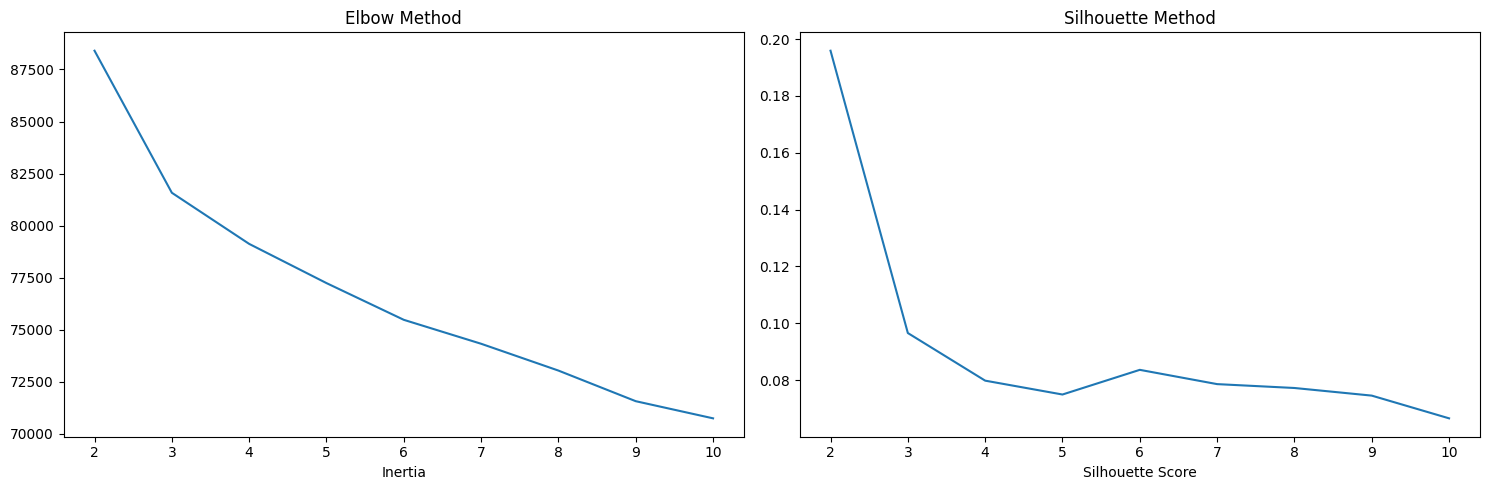

In [77]:
# gera os gráficos para definir a quantidade de clusters a serem gerados usando os métodos
# do COTOVELO e da SILHUETA - aqui definido que o melhor tamanho de cluster será de 3
from funcoes_auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df_acidentes_aero_trans)

In [78]:
RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df_acidentes_aero_trans)

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [79]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [80]:
pipeline.named_steps

{'pca': PCA(n_components=2, random_state=42),
 'clustering': KMeans(n_clusters=3, n_init=10, random_state=42)}

In [81]:
pipeline["clustering"].labels_

array([0, 0, 2, ..., 2, 0, 2])

In [82]:
df_clustered = df_acidentes_aero_trans.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_uf_***,one-hot__ocorrencia_uf_AC,one-hot__ocorrencia_uf_AL,one-hot__ocorrencia_uf_AM,one-hot__ocorrencia_uf_AP,one-hot__ocorrencia_uf_BA,one-hot__ocorrencia_uf_CE,one-hot__ocorrencia_uf_DF,one-hot__ocorrencia_uf_ES,one-hot__ocorrencia_uf_GO,one-hot__ocorrencia_uf_MA,one-hot__ocorrencia_uf_MG,one-hot__ocorrencia_uf_MS,one-hot__ocorrencia_uf_MT,one-hot__ocorrencia_uf_PA,one-hot__ocorrencia_uf_PB,one-hot__ocorrencia_uf_PE,one-hot__ocorrencia_uf_PI,one-hot__ocorrencia_uf_PR,one-hot__ocorrencia_uf_RJ,one-hot__ocorrencia_uf_RN,one-hot__ocorrencia_uf_RO,one-hot__ocorrencia_uf_RR,one-hot__ocorrencia_uf_RS,one-hot__ocorrencia_uf_SC,one-hot__ocorrencia_uf_SE,one-hot__ocorrencia_uf_SP,one-hot__ocorrencia_uf_TO,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_ano_fabricacao_0.0,one-hot__aeronave_ano_fabricacao_1900.0,one-hot__aeronave_ano_fabricacao_1936.0,one-hot__aeronave_ano_fabricacao_1940.0,one-hot__aeronave_ano_fabricacao_1942.0,one-hot__aeronave_ano_fabricacao_1944.0,one-hot__aeronave_ano_fabricacao_1945.0,one-hot__aeronave_ano_fabricacao_1946.0,one-hot__aeronave_ano_fabricacao_1947.0,one-hot__aeronave_ano_fabricacao_1948.0,one-hot__aeronave_ano_fabricacao_1949.0,one-hot__aeronave_ano_fabricacao_1950.0,one-hot__aeronave_ano_fabricacao_1951.0,one-hot__aeronave_ano_fabricacao_1952.0,one-hot__aeronave_ano_fabricacao_1953.0,one-hot__aeronave_ano_fabricacao_1954.0,one-hot__aeronave_ano_fabricacao_1955.0,one-hot__aeronave_ano_fabricacao_1956.0,one-hot__aeronave_ano_fabricacao_1957.0,one-hot__aeronave_ano_fabricacao_1958.0,one-hot__aeronave_ano_fabricacao_1959.0,one-hot__aeronave_ano_fabricacao_1960.0,one-hot__aeronave_ano_fabricacao_1961.0,one-hot__aeronave_ano_fabricacao_1962.0,one-hot__aeronave_ano_fabricacao_1963.0,one-hot__aeronave_ano_fabricacao_1964.0,one-hot__aeronave_ano_fabricacao_1965.0,one-hot__aeronave_ano_fabricacao_1966.0,one-hot__aeronave_ano_fabricacao_1967.0,one-hot__aeronave_ano_fabricacao_1968.0,one-hot__aeronave_ano_fabricacao_1969.0,one-hot__aeronave_ano_fabricacao_1970.0,one-hot__aeronave_ano_fabricacao_1971.0,one-hot__aeronave_ano_fabricacao_1972.0,one-hot__aeronave_ano_fabricacao_1973.0,one-hot__aeronave_ano_fabricacao_1974.0,one-hot__aeronave_ano_fabricacao_1975.0,one-hot__aeronave_ano_fabricacao_1976.0,one-hot__aeronave_ano_fabricacao_1977.0,one-hot__aeronave_ano_fabricacao_1978.0,one-hot__aeronave_ano_fabricacao_1979.0,one-hot__aeronave_ano_fabricacao_1980.0,one-hot__aeronave_ano_fabricacao_1981.0,one-hot__aeronave_ano_fabricacao_1982.0,one-hot__aeronave_ano_fabricacao_1983.0,one-hot__aeronave_ano_fabricacao_1984.0,one-hot__aeronave_ano_fabricacao_1985.0,one-hot__aeronave_ano_fabricacao_1986.0,one-hot__aeronave_ano_fabricacao_1987.0,one-hot__aeronave_ano_fabricacao_1988.0,one-hot__aeronave_ano_fabricacao_1989.0,one-hot__aeronave_ano_fabricacao_1990.0,one-hot__aeronave_ano_fabricacao_1991.0,one-hot__aeronave_ano_f

In [83]:
df_clustered["cluster"].value_counts()

cluster
2    4098
0    3483
1    1776
Name: count, dtype: int64

In [85]:
df_acidentes_aero['cluster'] = df_clustered['cluster']

In [86]:
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_ano_fabricacao,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_status,periodo,total_aeronaves_envolvidas,aeronave_pmd,aeronave_assentos,aeronave_fatalidades_total,ocorrencia_latitude,ocorrencia_longitude,cluster
0,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,BIMOTOR,1993.0,PARTIDA DO MOTOR,PRIVADA,***,***,***,***,***,***,00:00 às 06:00,1.0,2155.0,6.0,0.0,0.0,0.0,0
1,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,MONOMOTOR,1982.0,INDETERMINADA,PRIVADA,NENHUM,***,***,***,***,***,18:00 às 00:00,1.0,1315.0,4.0,0.0,0.0,0.0,0
2,INCIDENTE,PE,NÃO,AVIÃO,JATO,BIMOTOR,0.0,INDETERMINADA,***,***,***,***,***,***,***,18:00 às 00:00,1.0,0.0,0.0,0.0,0.0,0.0,2
3,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,MONOMOTOR,1991.0,MUDANÇA DE NÍVEL OU ALTITUDE,INSTRUÇÃO,***,***,***,***,***,***,00:00 às 06:00,1.0,770.0,2.0,0.0,0.0,0.0,0
4,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,BIMOTOR,1976.0,TÁXI,TÁXI AÉREO,NENHUM,***,***,***,***,***,18:00 às 00:00,1.0,3175.0,10.0,0.0,0.0,0.0,2


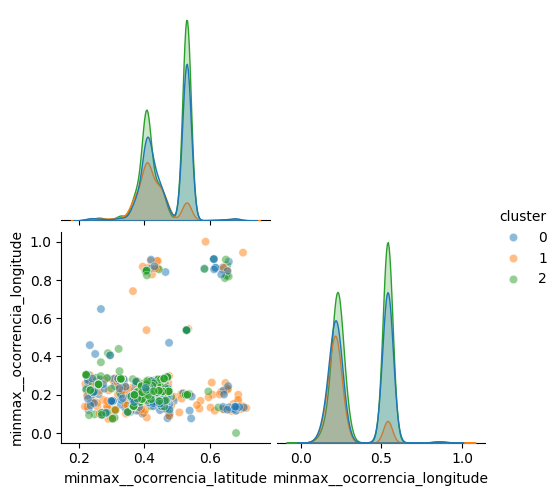

In [87]:
columns_analysis = ["minmax__ocorrencia_latitude", "minmax__ocorrencia_longitude"]

from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")

In [94]:
columns2 = list(df_acidentes_aero)

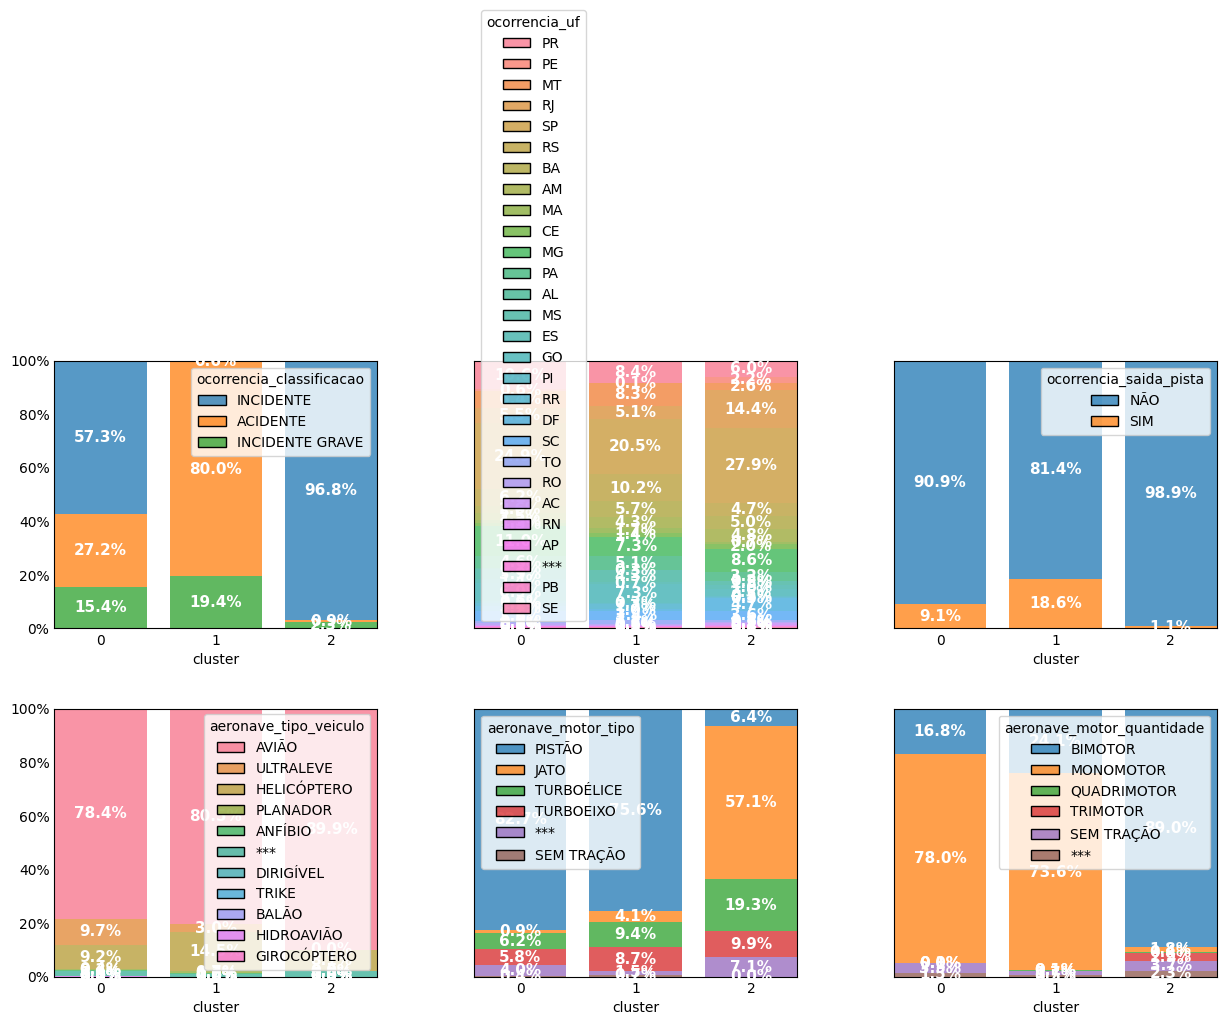

In [95]:
from auxiliary_functions import plot_columns_percent_by_cluster

plot_columns_percent_by_cluster(
    dataframe=df_acidentes_aero,
    columns=columns2,
)